In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data=pd.read_csv(r'C:\Users\User\Downloads/train_loan.csv')

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
data=data.drop(['Loan_ID'],axis=1)#loan id not needed

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Property_Area']=le.fit_transform(data['Property_Area'])                #making all values int
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
data['Education']=le.fit_transform(data['Education'])
data['Married']=le.fit_transform(data['Married'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [69]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [71]:
data.isnull().sum() #to check if there is null value

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:

data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())    # filling the null values
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [75]:
data['Dependents'] = data['Dependents'].replace('3+', 3) # changin '3+' to value 3

In [83]:
data['Dependents'] = data['Dependents'].fillna(data['Loan_Amount_Term'].median())

In [85]:
data.isnull().sum() #to check if there is null value

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
x=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Logistic regression**

In [92]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()


In [94]:
lr_model.fit(x_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y_pred_lr=lr_model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [102]:
print("accuracy=",accuracy_score(y_test,y_pred_lr))
print("confusion matrix=",confusion_matrix(y_test,y_pred_lr)) #best model

accuracy= 0.7804878048780488
confusion matrix= [[17 26]
 [ 1 79]]


# **KNN**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
metric_k=[]
neighbors=np.arange(3,16)
for n in neighbors:
  clf=KNeighborsClassifier(n_neighbors=n)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

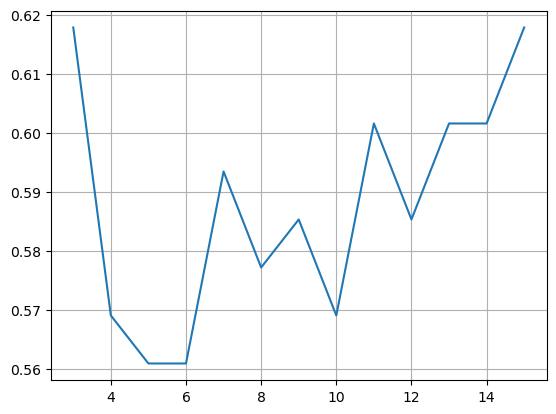

In [109]:
plt.plot(neighbors,metric_k)
plt.grid()

In [111]:
metric_k

[0.6178861788617886,
 0.5691056910569106,
 0.5609756097560976,
 0.5609756097560976,
 0.5934959349593496,
 0.5772357723577236,
 0.5853658536585366,
 0.5691056910569106,
 0.6016260162601627,
 0.5853658536585366,
 0.6016260162601627,
 0.6016260162601627,
 0.6178861788617886]

In [113]:
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred_knn))
print("confusion matrix= \n",confusion_matrix(y_test,y_pred_knn))

accuracy= 0.6016260162601627
confusion matrix= 
 [[ 3 40]
 [ 9 71]]


# **SVM**

In [116]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred_sv))
print("confusion matrix= \n",confusion_matrix(y_test,y_pred_sv))

accuracy= 0.6504065040650406
confusion matrix= 
 [[ 0 43]
 [ 0 80]]


# **Decision Tree Model**

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred_dt))
print("confusion matrix= \n",confusion_matrix(y_test,y_pred_dt))

accuracy= 0.7154471544715447
confusion matrix= 
 [[24 19]
 [16 64]]


# **Random forest**

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred_rf))
print("confusion matrix= \n",confusion_matrix(y_test,y_pred_rf))

accuracy= 0.7723577235772358
confusion matrix= 
 [[18 25]
 [ 3 77]]


# **Hyperparameter**

In [125]:
parameters={'n_estimators':[50,100,150],
            'max_depth':[None,5,10],
            'criterion':['gini','entropy']
            }

In [127]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(rf,parameters,cv=3,scoring='accuracy')

In [129]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [130]:
print('Best Parameters=',grid_search.best_params_)

Best Parameters= {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}


In [131]:
best_model=grid_search.best_estimator_

In [132]:
y_pred=best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7804878048780488

# **Randomized search cv**

In [134]:
from sklearn.model_selection import RandomizedSearchCV

In [135]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=10,
    cv=3,
    random_state=42,
    scoring='accuracy'
    )
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=150,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

#Cheack best model classifier

In [139]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)

print("Best_parameter found:",random_search.best_params_)
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Best_parameter found: {'n_estimators': 150, 'max_depth': 5, 'criterion': 'gini'}
Test Accuracy: 0.7804878048780488
